В датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

### Задание 1.
*Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?*

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('water.csv',na_values='?')
df.head

<bound method NDFrame.head of     Unnamed: 0 location           town  mortality  hardness
0            1    South           Bath       1247       105
1            2    North     Birkenhead       1668        17
2            3    South     Birmingham       1466         5
3            4    North      Blackburn       1800        14
4            5    North      Blackpool       1609        18
..         ...      ...            ...        ...       ...
56          57    South        Walsall       1527        60
57          58    South  West Bromwich       1627        53
58          59    South       West Ham       1486       122
59          60    South  Wolverhampton       1485        81
60          61    North           York       1378        71

[61 rows x 5 columns]>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [9]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


In [10]:
#выбросы по смертности
q1 = df['mortality'].quantile(0.25)
q3 = df['mortality'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['mortality'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [11]:
#выбросы по жесткости воды
q1 = df['hardness'].quantile(0.25)
q3 = df['hardness'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['hardness'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


Датасет чистый, выбросов и пропусков нет

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

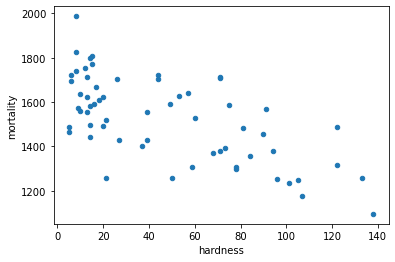

In [12]:
df.plot(kind='scatter', x='hardness', y='mortality') #график

На визуализации видно, что зависимость есть (обратная), но слабая и нелинейная: больше точек сгруппировано на уровне низких показателей жесткости

In [13]:
#коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [14]:
#коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Для оценки силы связи коэффициентов корреляции использую шкалу Чеддока:
*  от 0 до 0,3	очень слабая
*  от 0,3 до 0,5	слабая
*  от 0, 5 до 0,7	средняя
*  от 0,7 до 0, 9	высокая
*  от 0,9 до 1	очень высокая
* 0  величины не связаны


По коэффициентам видим обратную корреляцию средней силы: рост жесткости воды может влиять на снижение смертности

In [15]:
#регрессия
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
X = df[['hardness']]
y = df['mortality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
X_train.shape

(42, 1)

In [19]:
y_train.shape

(42,)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
model.coef_

array([-3.13167087])

In [22]:
model.intercept_

1668.9722977277095

Модель линейной регрессии у = -3,13 * х + 1668,97

In [35]:
#сравним прогноз и фактические значения
res_df = X_test.copy()
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df['delta'] = y_test - y_pred
res_df

,hardness,y_pred,y_test,delta
0,105,1340.146856,1247,-93.146856
5,10,1637.655589,1558,-79.655589
46,14,1625.128906,1495,-130.128906
31,44,1531.178779,1702,170.821221
13,78,1424.701970,1307,-117.701970
55,20,1606.338880,1625,18.661120
34,133,1252.460072,1259,6.539928
49,75,1434.096982,1587,152.903018
12,21,1603.207209,1519,-84.207209
40,6,1650.182272,1696,45.817728


На некоторых точках модель ошибается очень сильно

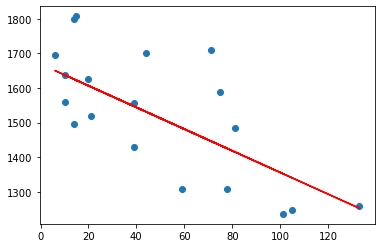

In [36]:
#визуализация модели
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [37]:
#коэффициент детерминации
model.score(X_test, y_test)

0.5046490611017092

Коэффициент детерминации равен 0,5, это значит, что на 50% смертность жителей обусловлена жесткостью воды, а на оставишиеся 50% другими факторами. 

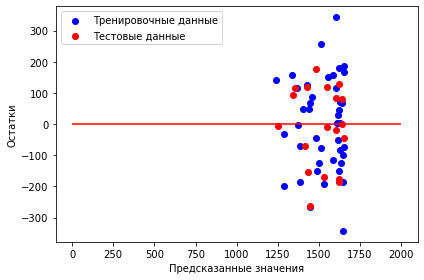

In [67]:
#график остатков
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='b', label='Тренировочные данные')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='r', label='Тестовые данные')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=2000, color='r')
plt.tight_layout()

В остатках прослеживается группировка в области некоторых значений и есть выбросы, этого говорит о недостаточном качестве модели.

### Задание 2.
*Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?*

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [68]:
south = df.loc[df['location'] == 'South']
south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [69]:
north = df.loc[df['location'] == 'North']
north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


#### Считаем все для севера

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

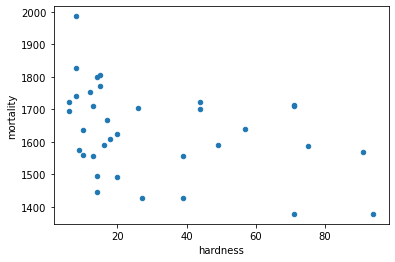

In [70]:
north.plot(kind='scatter', x='hardness', y='mortality') #график

На визуализации видно, что большинство точек сгруппировано на уровне низких показателей жесткости воды

In [71]:
#коэффициент корреляции Пирсона
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [72]:
#коэффициент корреляции Спирмена
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


По шкале Чеддока видим обратную слабую корреляцию: рост жесткости воды может слабо влиять на снижение смертности

In [98]:
#регрессия
X = north[['hardness']]
y = north['mortality']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [100]:
X_train.shape

(24, 1)

In [101]:
y_train.shape

(24,)

In [102]:
model_north = LinearRegression()
model_north.fit(X_train, y_train)

LinearRegression()

In [103]:
model_north.coef_

array([-1.97686226])

In [104]:
model_north.intercept_

1688.150229031281

Модель линейной регрессии представлена уравнением у = -1,97 * х + 1688,15

ValueError: x and y must have same first dimension, but have shapes (11, 1) and (19,)

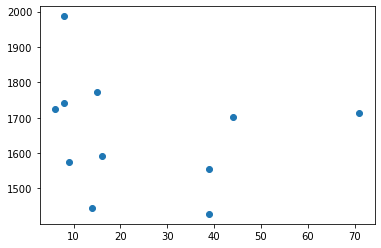

In [105]:
#визуализация модели
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [122]:
#коэффициент детерминации
model_north.score(X_test, y_test)

-4.912747256343536

Коэффициент детерминации равен -4,9, это значит, что модель получилась бесполезной и ее предсказания хуже, чем оценки на основе среднего значения.

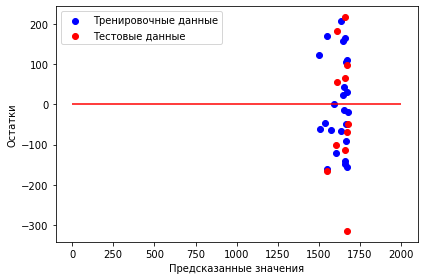

In [107]:
#график остатков
y_train_pred = model_north.predict(X_train)
y_test_pred = model_north.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='b', label='Тренировочные данные')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='r', label='Тестовые данные')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=2000, color='r')
plt.tight_layout()

График остатков подтверждает, что модель несостоятельна. Скорее всего потому, что осталось слишком мало даннях для анализа. 

#### Считаем все для юга

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

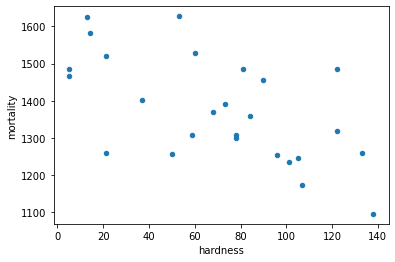

In [110]:
south.plot(kind='scatter', x='hardness', y='mortality') #график

На визуализации видно, что точки расположены практически хаотично и зависимости практически не прослеживается

In [111]:
#коэффициент корреляции Пирсона
south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [112]:
#коэффициент корреляции Спирмена
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


По шкале Чеддока коэффициенты показывают обратную корреляцию средней силы: рост жесткости воды может влиять на снижение смертности

In [113]:
#регрессия
X = south[['hardness']]
y = south['mortality']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [115]:
X_train.shape

(18, 1)

In [116]:
y_train.shape

(18,)

In [117]:
model_south = LinearRegression()
model_south.fit(X_train, y_train)

LinearRegression()

In [118]:
model_south.coef_

array([-3.51342921])

In [119]:
model_south.intercept_

1640.2204603423374

Модель линейной регрессии представлена уравнением у = -3,51 * х + 1640,22

ValueError: x and y must have same first dimension, but have shapes (8, 1) and (19,)

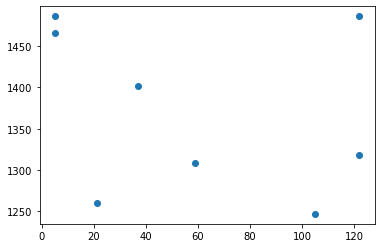

In [121]:
#визуализация модели
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [123]:
#коэффициент детерминации
model_south.score(X_test, y_test)

-2.551922301235205

Коэффициент детерминации равен -2,5, это значит, что модель получилась бесполезной и ее предсказания хуже, чем оценки на основе среднего значения.

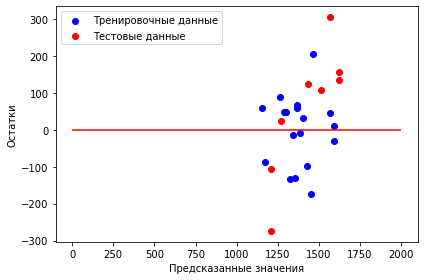

In [124]:
#график остатков
y_train_pred = model_south.predict(X_train)
y_test_pred = model_south.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='b', label='Тренировочные данные')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='r', label='Тестовые данные')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=2000, color='r')
plt.tight_layout()

График остатков сгрупирован в области определенных значений, это подтверждает, что качество модели низкое. 

**Вывод:** Влияние жесткости воды на смертность есть, но средней силы. На смертность влияет совокупность факторов, среди которых может быть и уровень жесткости воды. Стоит рассмотреть и другие факторы и построить многофакторные модели. 
Географическое положение не влияет на силу зависимости. Для более точных оценок нужно больше данных.